# NFL Injuries Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plays = pd.read_csv("PlayList.csv")
plays.head()

,PlayerKey,GameID,PlayKey,RosterPosition,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,PositionGroup
0,26624,26624-1,26624-1-1,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,1,QB,QB
1,26624,26624-1,26624-1-2,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,2,QB,QB
2,26624,26624-1,26624-1-3,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Rush,3,QB,QB
3,26624,26624-1,26624-1-4,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Rush,4,QB,QB
4,26624,26624-1,26624-1-5,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,5,QB,QB


In [3]:
plays.isna().sum()

PlayerKey             0
GameID                0
PlayKey               0
RosterPosition        0
PlayerDay             0
PlayerGame            0
StadiumType       16910
FieldType             0
Temperature           0
Weather           18691
PlayType            367
PlayerGamePlay        0
Position              0
PositionGroup         0
dtype: int64

In [4]:
players = pd.read_csv("PlayerTrackData.csv")
players.head()

,PlayKey,time,event,x,y,dir,dis,o,s
0,26624-1-1,0.0,huddle_start_offense,87.46,28.93,288.24,0.01,262.33,0.13
1,26624-1-1,0.1,NaN,87.45,28.92,283.91,0.01,261.69,0.12
2,26624-1-1,0.2,NaN,87.44,28.92,280.40,0.01,261.17,0.12
3,26624-1-1,0.3,NaN,87.44,28.92,278.79,0.01,260.66,0.10
4,26624-1-1,0.4,NaN,87.44,28.92,275.44,0.01,260.27,0.09


In [5]:
inj = pd.read_csv("InjuryRecord.csv")
inj

,PlayerKey,GameID,PlayKey,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42
0,39873,39873-4,39873-4-32,Knee,Synthetic,1,1,1,1
1,46074,46074-7,46074-7-26,Knee,Natural,1,1,0,0
2,36557,36557-1,36557-1-70,Ankle,Synthetic,1,1,1,1
3,46646,46646-3,46646-3-30,Ankle,Natural,1,0,0,0
4,43532,43532-5,43532-5-69,Ankle,Synthetic,1,1,1,1
5,41145,41145-2,41145-2-60,Knee,Natural,1,0,0,0
6,46014,46014-10,46014-10-22,Ankle,Synthetic,1,1,1,1
7,44860,44860-5,44860-5-52,Knee,Natural,1,1,0,0
8,44806,44806-7,44806-7-61,Knee,Synthetic,1,0,0,0
9,45962,45962-8,45962-8-40,Ankle,Synthetic,1,1,0,0


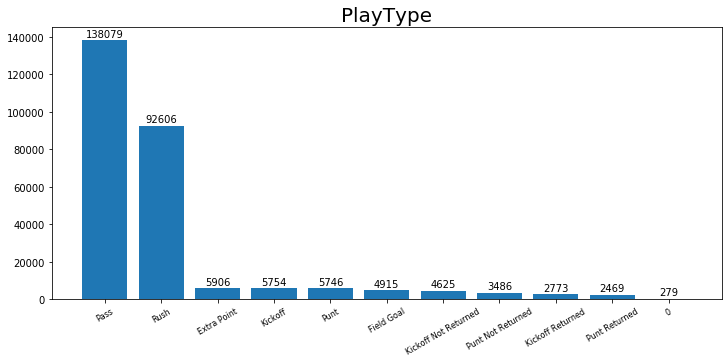

In [6]:
label = plays["PlayType"].value_counts().keys()
fig, ax = plt.subplots(figsize=(12, 5))
plt.bar(label, plays["PlayType"].value_counts())
plt.xticks(label, fontsize=8, rotation=30)
plt.title("PlayType", fontsize=20)
for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        ax.annotate(y_value, (x_value, y_value),xytext=(0, 3), textcoords="offset points", ha='center')
      
plt.show()

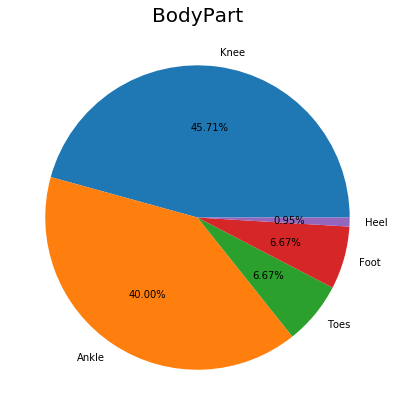

In [13]:
label2 = inj.BodyPart.value_counts().keys()
fig2, ax2 = plt.subplots(figsize=(10, 7))
plt.pie(inj["BodyPart"].value_counts().values, labels=label2, autopct='%.2f%%')
plt.title("BodyPart", fontsize=20)
plt.show()

In [52]:
df_merged = pd.merge(inj, plays, on=['PlayerKey', 'GameID', 'PlayKey'], how='left')
df_merged = df_merged.drop(['RosterPosition', 'Surface'], axis = 1)

#--- Cleaning 'StadiumType' ---
df_merged["StadiumType"] = df_merged["StadiumType"].str.replace('Outdoors|Outddors|Oudoor|Open|Retr. Roof - Open|Indoor, Open Roof|Retractable Roof', 'Outdoor')
df_merged["StadiumType"] = df_merged["StadiumType"].str.replace('Indoors|Dome|Indoor, Roof Closed|Retr. Roof - Closed|Domed, closed|Closed Dome|Retr. Roof-Closed|Indoord, closed', 'Indoor')

#--- Weather' ---
df_merged["Weather"] = df_merged["Weather"].str.replace('Clear|Clear skies|Fair|Clear Skies|Clear and warm|Sun & clouds|Mostly Sunny|Mostly sunny', 'Sunny')
df_merged["Weather"] = df_merged["Weather"].str.replace('Sunny skies|Sunny Skies|Sunny and warm', 'Sunny')
df_merged["Weather"] = df_merged["Weather"].str.replace('Partly Cloudy|Cloudy, 50% change of rain|Cloudy with periods of rain, thunder possible. Winds shifting to WNW, 10-20 mph.|Mostly cloudy|Cloudy and Cool|Coudy', 'Cloudy')
df_merged["Weather"] = df_merged["Weather"].str.replace('Rain shower|Light Rain', 'Rain')
df_merged["Weather"] = df_merged["Weather"].str.replace('Indoors|Controlled Climate', 'Indoor')

df_merged

,PlayerKey,GameID,PlayKey,BodyPart,DM_M1,DM_M7,DM_M28,DM_M42,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,PositionGroup
0,39873,39873-4,39873-4-32,Knee,1,1,1,1,29.0,4.0,Indoor,Synthetic,84.0,Cloudy,Punt,32.0,OLB,LB
1,46074,46074-7,46074-7-26,Knee,1,1,0,0,50.0,7.0,Outdoor,Natural,76.0,Cloudy,Punt,26.0,OLB,LB
2,36557,36557-1,36557-1-70,Ankle,1,1,1,1,1.0,1.0,Outdoor,Synthetic,63.0,Sunny,Pass,70.0,SS,DB
3,46646,46646-3,46646-3-30,Ankle,1,0,0,0,15.0,3.0,Outdoor,Natural,80.0,Cloudy,Punt,30.0,LB,LB
4,43532,43532-5,43532-5-69,Ankle,1,1,1,1,32.0,5.0,Outdoor,Synthetic,89.0,Cloudy,Kickoff,69.0,WR,WR
5,41145,41145-2,41145-2-60,Knee,1,0,0,0,11.0,2.0,Outdoor,Natural,89.0,Sunny,Pass,60.0,SS,DB
6,46014,46014-10,46014-10-22,Ankle,1,1,1,1,71.0,10.0,Outdoor,Synthetic,60.0,Sunny,Rush,22.0,RB,RB
7,44860,44860-5,44860-5-52,Knee,1,1,0,0,29.0,5.0,Outdoor,Natural,67.0,Cloudy,Rush,52.0,OLB,LB
8,44806,44806-7,44806-7-61,Knee,1,0,0,0,43.0,7.0,Indoor,Synthetic,-999.0,Indoor,Rush,61.0,ILB,LB
9,45962,45962-8,45962-8-40,Ankle,1,1,0,0,54.0,8.0,Outdoor,Synthetic,68.0,Sunny,Pass,40.0,WR,WR


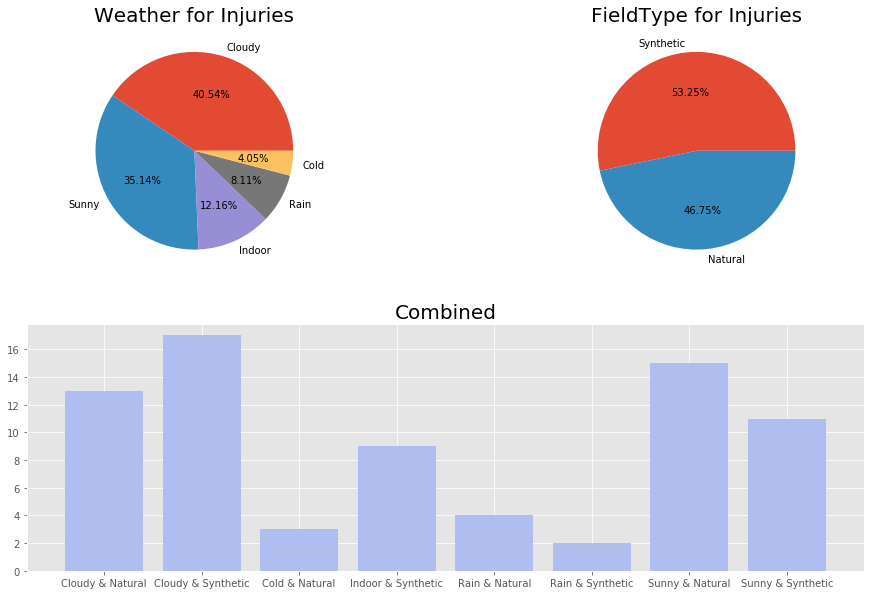

In [112]:
fig = plt.figure(figsize=(15, 10))
grid = plt.GridSpec(2, 2, hspace=0.2, wspace=0.5)
ax3 = fig.add_subplot(grid[0,0])
ax4 = fig.add_subplot(grid[0,1])
ax5 = fig.add_subplot(grid[1,:])

label3 = df_merged["Weather"].value_counts().keys()
ax3.pie(df_merged["Weather"].value_counts().values, labels=label3, autopct='%.2f%%')
ax3.set_title("Weather for Injuries", fontsize=20)

label4 = df_merged["FieldType"].value_counts().keys()
ax4.pie(df_merged["FieldType"].value_counts().values, labels=label4, autopct='%.2f%%')
ax4.set_title("FieldType for Injuries", fontsize=20)

label5 = ['Cloudy & Natural', 'Cloudy & Synthetic', 'Cold & Natural', 'Indoor & Synthetic', 'Rain & Natural', 'Rain & Synthetic'
          , 'Sunny & Natural', 'Sunny & Synthetic']
ax5.bar(label5, df_merged.groupby(["Weather", "FieldType"]).size().values, color = '#afbdef')
ax5.set_title("Combined", fontsize=20)


plt.show()

In [16]:
snow = plays[plays['Weather'] == 'Heavy lake effect snow']
snow

,PlayerKey,GameID,PlayKey,RosterPosition,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,PositionGroup
21636,35617,35617-13,35617-13-1,Running Back,92,13,Outdoors,Synthetic,32,Heavy lake effect snow,Rush,1,RB,RB
21637,35617,35617-13,35617-13-2,Running Back,92,13,Outdoors,Synthetic,32,Heavy lake effect snow,Pass,2,RB,RB
21638,35617,35617-13,35617-13-3,Running Back,92,13,Outdoors,Synthetic,32,Heavy lake effect snow,Rush,3,RB,RB
21639,35617,35617-13,35617-13-4,Running Back,92,13,Outdoors,Synthetic,32,Heavy lake effect snow,Rush,4,RB,RB
21640,35617,35617-13,35617-13-5,Running Back,92,13,Outdoors,Synthetic,32,Heavy lake effect snow,Rush,5,RB,RB
21641,35617,35617-13,35617-13-6,Running Back,92,13,Outdoors,Synthetic,32,Heavy lake effect snow,Rush,6,RB,RB
21642,35617,35617-13,35617-13-7,Running Back,92,13,Outdoors,Synthetic,32,Heavy lake effect snow,Pass,7,RB,RB
21643,35617,35617-13,35617-13-8,Running Back,92,13,Outdoors,Synthetic,32,Heavy lake effect snow,Rush,8,RB,RB
21644,35617,35617-13,35617-13-9,Running Back,92,13,Outdoors,Synthetic,32,Heavy lake effect snow,Rush,9,RB,RB
21645,35617,35617-13,35617-13-10,Running Back,92,13,Outdoors,Synthetic,32,Heavy lake effect snow,Rush,10,RB,RB


In [23]:
snow_inj = inj[inj['GameID'] == '45962-12']
snow_inj

,PlayerKey,GameID,PlayKey,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42
